In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px

In [2]:
# Lendo o DataFrame no momento não limpo. ~Victor Bittencourt
df = pd.read_csv('final_depression_dataset_1.csv')
df.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [3]:
# Convertendo as colunas para o melhor tipo e arrumando os espaços nos nomes das colunas. ~Victor Bittencourt
for col in df.columns:
    df[col].convert_dtypes()
    
    df.rename(columns={
        col: col.lower().replace(" ", "_")
    }, inplace=True)

In [4]:
# Informações da coluna, assim como as informações por trás de cada tipagem de dados. ~Victor Bittencourt
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   name                                   2556 non-null   object 
 1   gender                                 2556 non-null   object 
 2   age                                    2556 non-null   int64  
 3   city                                   2556 non-null   object 
 4   working_professional_or_student        2556 non-null   object 
 5   profession                             1883 non-null   object 
 6   academic_pressure                      502 non-null    float64
 7   work_pressure                          2054 non-null   float64
 8   cgpa                                   502 non-null    float64
 9   study_satisfaction                     502 non-null    float64
 10  job_satisfaction                       2054 non-null   float64
 11  slee

In [5]:
# Pegando as cinco primeiras linhas do DataFrame. ~Victor Bittencourt
df.head()

,name,gender,age,city,working_professional_or_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [6]:
# Fazendo a contagem atual de quais valores temos na coluna de  'working_professional_or_student'. ~Victor Bittencourt
df['working_professional_or_student'].value_counts()

working_professional_or_student
Working Professional    2054
Student                  502
Name: count, dtype: int64

In [7]:
# Substituindo os valores de 'Working Professional' e 'Student' por 1 e 0, respectivamente. ~Victor Bittencourt
df['working_professional_or_student'].replace({
    "Working Professional": 1,
    "Student": 0
}, inplace=True)

In [8]:
# Renomeando a coluna para 'isWorking', visto que, este valor categorico so tem duas classes. ~Victor Bittencourt
df.rename(columns={
    "working_professional_or_student": "isWorking"
})

,name,gender,age,city,isWorking,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,Pooja,Female,37,Ghaziabad,1,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,1,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,1,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,1,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,1,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,1,Consultant,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,1,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,1,HR Manager,NaN,1.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,1,Business Analyst,NaN,2.0,NaN,NaN,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


In [9]:
# Preenchendo os valores nulos com 0, já que, a ausencia de um valor no academic indica a presença de outro no 
# work_pressure e entre outros. ~Victor Bittencourt
df['academic_pressure'].fillna(0, inplace=True)

df['work_pressure'].fillna(0, inplace=True)

df['study_satisfaction'].fillna(0, inplace=True)

df['job_satisfaction'].fillna(0, inplace=True)

In [10]:
# Criando uma nova coluna com a "soma" (não existe a soma, mas sim a concatenação das colunas)
# de 'academic_pressure' e 'work_pressure'. ~Victor Bittencourt
df['general_pressure'] = df['academic_pressure'] + df['work_pressure']

# A mesma coisa para 'job_satisfaction' e 'study_satisfaction'. ~Victor Bittencourt
df['general_satisfaction'] = df['job_satisfaction'] + df['study_satisfaction']

# Dropando as colunas que não são mais necessárias. ~Victor Bittencourt
toDrop = ['academic_pressure', 'work_pressure', 'job_satisfaction', 'study_satisfaction']
df.drop(columns=toDrop).head()

,name,gender,age,city,working_professional_or_student,profession,cgpa,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression,general_pressure,general_satisfaction
0,Pooja,Female,37,Ghaziabad,1,Teacher,NaN,7-8 hours,Moderate,MA,No,6,2,No,No,2.0,4.0
1,Reyansh,Male,60,Kalyan,1,Financial Analyst,NaN,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No,4.0,3.0
2,Manvi,Female,42,Bhopal,1,Teacher,NaN,5-6 hours,Moderate,M.Com,No,0,2,No,No,2.0,3.0
3,Isha,Female,44,Thane,1,Teacher,NaN,7-8 hours,Healthy,MD,Yes,1,2,Yes,No,3.0,5.0
4,Aarav,Male,48,Indore,1,UX/UI Designer,NaN,7-8 hours,Moderate,BE,Yes,6,5,Yes,No,4.0,3.0


In [11]:
# Vendo uma média em % de quantos falores faltam por coluna ~Victor Bittencourt
df.isna().mean() * 100 

# cgpa é o score acadêmico e profession é a profissão atual da pessoa

name                                      0.000000
gender                                    0.000000
age                                       0.000000
city                                      0.000000
working_professional_or_student           0.000000
profession                               26.330203
academic_pressure                         0.000000
work_pressure                             0.000000
cgpa                                     80.359937
study_satisfaction                        0.000000
job_satisfaction                          0.000000
sleep_duration                            0.000000
dietary_habits                            0.000000
degree                                    0.000000
have_you_ever_had_suicidal_thoughts_?     0.000000
work/study_hours                          0.000000
financial_stress                          0.000000
family_history_of_mental_illness          0.000000
depression                                0.000000
general_pressure               

In [12]:
# Transformando as categorias de sono em métricas ~Victor Bittencourt
df['sleep_duration'].replace({
    "7-8 hours": 4,
    "Less than 5 hours": 1,
    "5-6 hours": 2,
    "More than 8 hours": 3
}, inplace=True)

In [13]:
# Visualizando as mesmas métricas de sono ~Victor Bittencourt
df['sleep_duration'].value_counts()

sleep_duration
4    658
1    648
2    628
3    622
Name: count, dtype: int64

In [14]:
# Vendo a quantidade de diplomas e seus tipos ~Victor Bittencourt
df['degree'].value_counts()

degree
Class 12    275
B.Com       115
B.Ed        112
MCA         108
BCA         103
MSc          95
MBA          95
BSc          94
BBA          92
BHM          90
B.Arch       89
BA           89
B.Pharm      88
M.Tech       85
M.Pharm      85
ME           84
LLM          84
BE           84
LLB          82
PhD          81
MHM          81
M.Ed         81
MA           79
MBBS         75
MD           74
B.Tech       71
M.Com        65
Name: count, dtype: int64

In [15]:
# substituindo todos por classes gerais ~Victor Bittencourt
df['degree'].replace({
    "M.Com": "Master",
    "MD": 'Master',
    "MBBS": "Master",
    "MA": "Master",
    "MHM": "Master",
    "M.Ed": "Master",
    "ME": 'Master',
    "M.Pharm": "Master",
    "M.Tech": "Master",
    "MBA": "Master",
    "MSc": "Master",
    "MCA": "Master",
    "LLM": "Master",
    "PhD": "Master",
    
    # Masters above, Bacharel below
    
    "B.Tech": "Bacharel",
    "LLB": "Bacharel",
    "BE": "Bacharel",
    "B.Pharm": "Bacharel",
    "B.Arch": "Bacharel",
    "BA": "Bacharel",
    "BHM": "Bacharel",
    "BBA": "Bacharel",
    "BSc": "Bacharel",
    "BCA": "Bacharel",
    "B.Ed": "Bacharel",
    "B.Com": "Bacharel",
    "Class 12": "Bacharel"
}, inplace=True)

In [16]:
# Trocando por valores inteiros ~Victor Bittencourt
df['degree'].replace({
    "Master": 1,
    "Bacharel": 0
}, inplace=True)

In [17]:
df['degree'].value_counts()

degree
0    1384
1    1172
Name: count, dtype: int64

In [18]:
df['work/study_hours'].value_counts()

work/study_hours
10    218
9     210
2     206
11    205
0     204
5     197
6     195
3     192
1     191
12    191
7     186
4     186
8     175
Name: count, dtype: int64

In [19]:
# Trocando strings por valores booleanos ~Victor Bittencourt
df['have_you_ever_had_suicidal_thoughts_?'].replace({
    "Yes": True,
    "No": False
}, inplace=True)

# Convertendo os booleanos em inteiros para assimilar melhor
df['have_you_ever_had_suicidal_thoughts_?'] = df['have_you_ever_had_suicidal_thoughts_?'].astype(int)

In [20]:
# Contagem ~Victor Bittencourt
df['have_you_ever_had_suicidal_thoughts_?'].value_counts()

have_you_ever_had_suicidal_thoughts_?
0    1307
1    1249
Name: count, dtype: int64

In [21]:
df['dietary_habits'].value_counts()

dietary_habits
Unhealthy    882
Healthy      842
Moderate     832
Name: count, dtype: int64

In [22]:
df['dietary_habits'] = df['dietary_habits'].replace({
    'Unhealthy': -1,
    'Healthy': 1,
    'Moderate': 0
})

In [23]:
df['general_satisfaction'].value_counts()

general_satisfaction
2.0    531
5.0    528
4.0    508
3.0    507
1.0    482
Name: count, dtype: int64

In [24]:
# Aqui temos o DataFrame meio-limpo ~Victor Bittencourt
# df.to_csv('halfTreatedDepression.csv')

In [25]:
nonCorrCol = ['name', 'city', 'cgpa']
halfTreated = df.drop(columns=nonCorrCol)

In [26]:
def categorial_to_bool_to_int(df, spec_type, col, replace_val: dict = None):
    if not replace_val:
        replace_val = {
            "Yes": True,
            "No": False
        }
        
    df[col].replace(
        replace_val
    , inplace=True)
    
    return df[col].astype(spec_type)

In [27]:
halfTreated['family_history_of_mental_illness'] = categorial_to_bool_to_int(halfTreated, int, 'family_history_of_mental_illness')

In [28]:
halfTreated['depression'] = categorial_to_bool_to_int(halfTreated, int, 'depression')

In [29]:
halfTreated.head()

,gender,age,working_professional_or_student,profession,academic_pressure,work_pressure,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression,general_pressure,general_satisfaction
0,Female,37,1,Teacher,0.0,2.0,0.0,4.0,4,0,1,0,6,2,0,0,2.0,4.0
1,Male,60,1,Financial Analyst,0.0,4.0,0.0,3.0,2,-1,0,1,0,4,1,0,4.0,3.0
2,Female,42,1,Teacher,0.0,2.0,0.0,3.0,2,0,1,0,0,2,0,0,2.0,3.0
3,Female,44,1,Teacher,0.0,3.0,0.0,5.0,4,1,1,1,1,2,1,0,3.0,5.0
4,Male,48,1,UX/UI Designer,0.0,4.0,0.0,3.0,4,0,0,1,6,5,1,0,4.0,3.0


In [30]:
halfTreated['gender'] = categorial_to_bool_to_int(halfTreated, int, 'gender', replace_val= {
    "Female": 0,
    "Male": 1
})

In [31]:
halfTreated.convert_dtypes()

,gender,age,working_professional_or_student,profession,academic_pressure,work_pressure,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression,general_pressure,general_satisfaction
0,0,37,1,Teacher,0,2,0,4,4,0,1,0,6,2,0,0,2,4
1,1,60,1,Financial Analyst,0,4,0,3,2,-1,0,1,0,4,1,0,4,3
2,0,42,1,Teacher,0,2,0,3,2,0,1,0,0,2,0,0,2,3
3,0,44,1,Teacher,0,3,0,5,4,1,1,1,1,2,1,0,3,5
4,1,48,1,UX/UI Designer,0,4,0,3,4,0,0,1,6,5,1,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1,25,1,Consultant,0,1,0,5,2,1,0,1,12,3,1,0,1,5
2552,0,23,1,Teacher,0,3,0,1,1,0,1,1,8,3,0,1,3,1
2553,0,24,1,HR Manager,0,1,0,4,1,0,0,1,4,4,0,0,1,4
2554,0,56,1,Business Analyst,0,2,0,3,4,1,0,0,4,5,1,0,2,3


<Axes: >

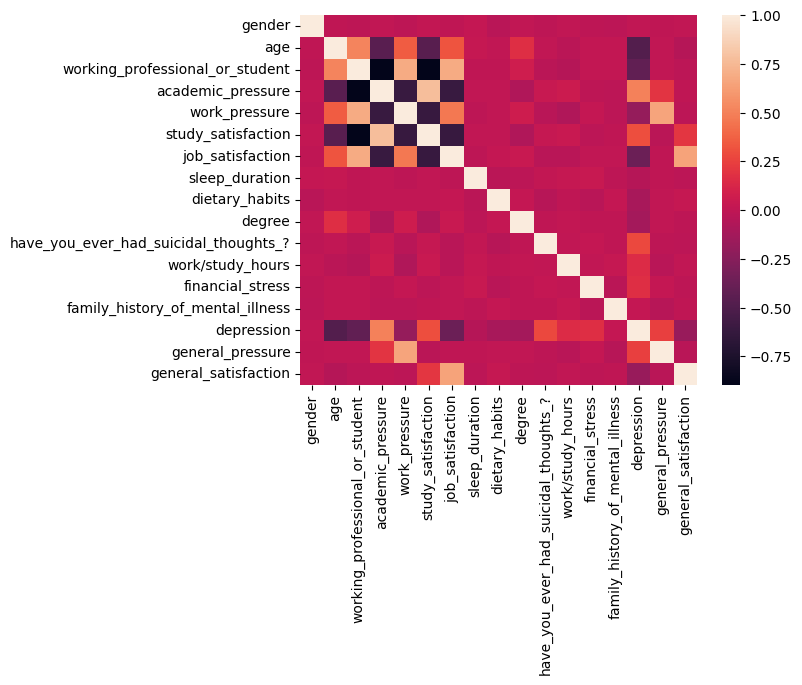

In [32]:
d = halfTreated.corr(numeric_only=True)
sb.heatmap(d)

In [33]:
halfTreated.to_csv('fullyTreated.csv')

In [34]:
depression_df = pd.read_csv('fullyTreated.csv')
depression_df.head()

,Unnamed: 0,gender,age,working_professional_or_student,profession,academic_pressure,work_pressure,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression,general_pressure,general_satisfaction
0,0,0,37,1,Teacher,0.0,2.0,0.0,4.0,4,0,1,0,6,2,0,0,2.0,4.0
1,1,1,60,1,Financial Analyst,0.0,4.0,0.0,3.0,2,-1,0,1,0,4,1,0,4.0,3.0
2,2,0,42,1,Teacher,0.0,2.0,0.0,3.0,2,0,1,0,0,2,0,0,2.0,3.0
3,3,0,44,1,Teacher,0.0,3.0,0.0,5.0,4,1,1,1,1,2,1,0,3.0,5.0
4,4,1,48,1,UX/UI Designer,0.0,4.0,0.0,3.0,4,0,0,1,6,5,1,0,4.0,3.0


In [35]:
depression_df = depression_df.drop(columns='Unnamed: 0')
depression_df.head()

,gender,age,working_professional_or_student,profession,academic_pressure,work_pressure,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression,general_pressure,general_satisfaction
0,0,37,1,Teacher,0.0,2.0,0.0,4.0,4,0,1,0,6,2,0,0,2.0,4.0
1,1,60,1,Financial Analyst,0.0,4.0,0.0,3.0,2,-1,0,1,0,4,1,0,4.0,3.0
2,0,42,1,Teacher,0.0,2.0,0.0,3.0,2,0,1,0,0,2,0,0,2.0,3.0
3,0,44,1,Teacher,0.0,3.0,0.0,5.0,4,1,1,1,1,2,1,0,3.0,5.0
4,1,48,1,UX/UI Designer,0.0,4.0,0.0,3.0,4,0,0,1,6,5,1,0,4.0,3.0


In [36]:
fig = px.box(depression_df, x='profession', y='age', color='profession', title='Visualizando idade e suas tendências por profissão', )
fig.update_layout(xaxis_title='___', legend_title='profissões', yaxis_title='___')

fig.show()

## verificando a existência de outliers no dataframe, 'coluna profession' ~Nestor Preissler

In [37]:
fig = px.box(depression_df, x='profession', y='general_pressure', color='profession', title='Visualizando perssão geral e suas tendências por profissão', )
fig.update_layout(xaxis_title='___', legend_title='profissões', yaxis_title='____')

fig.show()

## same ^

In [38]:
fig = px.box(depression_df, x='profession', y='work/study_hours', color='profession', title='Visualizando horas de estudo ou trabalho, e suas tendências por profissão', )
fig.update_layout(xaxis_title='___', legend_title='profissões', yaxis_title='____')

fig.show()

## same ^

In [39]:
fig = px.box(depression_df, x='profession', y='sleep_duration', color='profession', title='Visualizando duração de sono e suas tendências por profissão', )
fig.update_layout(xaxis_title='___', legend_title='profissões', yaxis_title='____')

fig.show()

## same ^